In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm


In [2]:
df = pd.read_pickle('data/1min_normalized.pkl')
df = df.reset_index()
df = df[pd.notnull(df).all(axis=1)]
df = df.reindex(np.random.permutation(df.index))
df.head()

,index,date,pressure,temperature,humidity,so2,h2s,h2s_ref,captor,0,...,5,6,7,8,9,10,11,12,13,14
11789,8521,2016-09-13 18:15:00,-1.68368,2.047884,-1.653551,0.538226,"[-0.93734382013, -0.93734382013, -0.9373438201...",-0.140406,1304,-0.937344,...,-0.937344,-0.937344,-0.937344,-0.937344,-0.937344,-0.937344,-0.937344,-0.937344,-0.937344,-0.937344
5168,1900,2016-06-13 05:00:00,-1.68368,-0.734962,0.851473,-0.432328,"[0.074282779895, 0.242887213233, 0.07428277989...",-0.213229,1304,0.074283,...,0.242887,-0.094322,0.242887,0.242887,0.074283,0.074283,0.074283,0.074283,0.411492,0.074283
413,413,2016-05-28 15:00:00,-0.942316,1.850766,-1.649117,-0.432328,"[-0.600134953455, -0.431530520118, -0.09432165...",-0.254843,1303,-0.600135,...,-0.768739,-0.600135,-0.768739,-0.431531,-0.431531,-0.768739,-0.768739,0.074283,-0.262926,0.074283
5057,1789,2016-06-12 01:15:00,-0.794043,-0.387106,0.709595,-0.432328,"[-0.0943216534426, 0.074282779895, -0.26292608...",-0.254843,1304,-0.094322,...,-0.094322,-0.262926,0.411492,-0.262926,0.074283,0.074283,-0.431531,-0.262926,-0.262926,-0.431531
1371,1371,2016-06-07 15:30:00,0.836963,1.873956,-1.857500,-0.432328,"[-0.600134953455, -0.26292608678, -0.431530520...",-0.254843,1303,-0.600135,...,-0.600135,-0.600135,-0.768739,-0.600135,-0.431531,-0.768739,-0.431531,-0.768739,-0.768739,-0.768739


In [3]:
def split_dataframe(dataframe, percent):
    nb_rows = int(np.floor(percent * len(dataframe)))
    return dataframe[:nb_rows], dataframe[nb_rows:]

def dataframe_to_xy(df):
    return (np.array(df[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, \
                         'h2s_ref', 'pressure', 'temperature', 'humidity', ]]),\
            np.array(df['so2']))

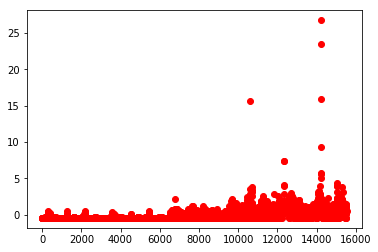

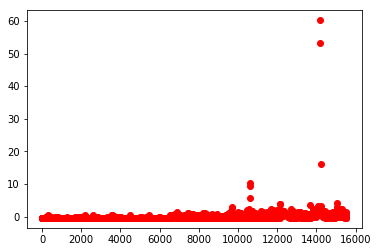

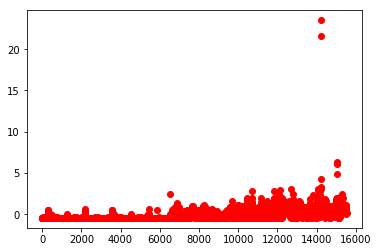

In [ ]:
df_test, df_train = split_dataframe(df, 0.5) 
df_valid, df_test = split_dataframe(df_test, 0.5)

plt.plot(df_train['so2'], 'ro')
plt.show()

plt.plot(df_valid['so2'], 'ro')
plt.show()

plt.plot(df_test['so2'], 'ro')
plt.show()

X_train, y_train = dataframe_to_xy(df_train)
X_valid, y_valid = dataframe_to_xy(df_valid)
X_test, y_test = dataframe_to_xy(df_test)

In [ ]:
C_grid = np.logspace(1, 3, 10)
gamma_grid = np.logspace(-4, -1, 10)

scores = np.empty((len(C_grid), len(gamma_grid)))
for i in range(len(C_grid)):
    for j in range(len(gamma_grid)):
        clf = svm.SVR(C=C_grid[i], gamma=gamma_grid[j], verbose=1)
        clf.fit(X_train, y_train)
        score = clf.score(X_valid, y_valid)
        scores[i, j] = score

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [ ]:
ax = sns.heatmap(-scores, cmap="YlGnBu")
plt.show()

In [ ]:
C_idx, gamma_idx = np.unravel_index(scores.argmax(), scores.shape) # Meilleur résultat en validation
clf = svm.SVR(C=C_grid[C_idx], gamma=gamma_grid[gamma_idx])
clf.fit(X_train, y_train) 
err_test = clf.score(X_test, y_test)

In [ ]:
y_pred = clf.predict(X_test)
tolerances = np.linspace(0, 1, 10)
acc = []
for tol in tolerances:
    acc.append(np.sum(np.abs(y_pred.flatten() - y_test.flatten()) <= tol) / len(y_test))
    
plt.figure()
plt.title('Précision en fonction de la tolérance')
plt.plot(tolerances, acc)
plt.show()

plt.figure()
plt.title('y_pred, y_test')
plt.plot(y_pred[:500], '-r')
plt.plot(y_test[:500], '--b')
plt.savefig("svr_so2.svg")
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [ ]:
def baseline_model(dense_size, input_dim, loss_function, optimizer):
    # create model
    model = Sequential()
    model.add(Dense(dense_size, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss=loss_function, optimizer=optimizer)
    model.summary()
    return model

In [ ]:
p = 5
input_dim = 19
models_info = {
    'models': {},
    'loss_function': 'mse',
    'optimizer': 'adagrad',
    'name': '1 Layer: {} neurons'
}
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=3)
tolerances = np.linspace(0, 1, 10)

for i in range(p):
    info_dict = {}

    model = baseline_model(2**(i+1), input_dim, 'mse', 'adagrad')
    history = model.fit(X_train, y_train, batch_size=5, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=0)
    info_dict['loss'] = history.history['loss']
    info_dict['val_loss'] = history.history['val_loss']
    
    info_dict['score'] = model.evaluate(X_test, y_test, batch_size=5)
    y_pred = model.predict(X_test)
    acc = []
    for tol in tolerances:
        y_tol = tol*y_train.flatten()
        accur = np.sum(np.abs(y_pred.flatten() - y_test.flatten()) <= tol) / len(y_test)
        acc.append(accur)
    info_dict['accuracies'] = acc
    models_info['models'][2**(i+1)] = info_dict

In [ ]:
nb_models = len(models_info)
for nb_neurons, info_dict in models_info['models'].items():
    plt.plot(info_dict['loss'], 'r-')
    plt.plot(info_dict['val_loss'], 'b-')
    plt.title('Number of neurons: {}'.format(str(nb_neurons)))
    plt.show()

In [ ]:
input_dim = 19
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=10)
tolerances = np.linspace(0, 1, 10)
model = baseline_model(32, input_dim, 'mse', 'adagrad')
hist = model.fit(X_train, y_train, batch_size=5, epochs=1000, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=0)


y_pred = model.predict(X_test)
acc = []
for tol in tolerances:
    y_tol = tol*y_train.flatten()
    accur = np.sum(np.abs(y_pred.flatten() - y_test.flatten()) <= tol) / len(y_test)
    acc.append(accur)






In [ ]:
plt.plot(hist.history['loss'], 'r-')
plt.plot(hist.history['val_loss'], 'b-')
plt.show()

plt.plot(y_pred, 'r--')
plt.plot(y_test, 'b-')
plt.savefig("nn_so2.svg")
plt.show()